<div class='alert alert-warning'>

# JupyterLite warning

If you are running the current notebook in JupyterLite, you may encounter some unexpected behavior.

The main difference is that imports take longer than usual, for example the first `import sklearn` can take up to 10-20s.

If you notice problems, feel free to open an [issue](https://github.com/probabl-ai/youtube-appendix/issues/new/choose) about it.
</div>

In [ ]:
%pip install drawdata
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

<Axes: xlabel='x', ylabel='y'>

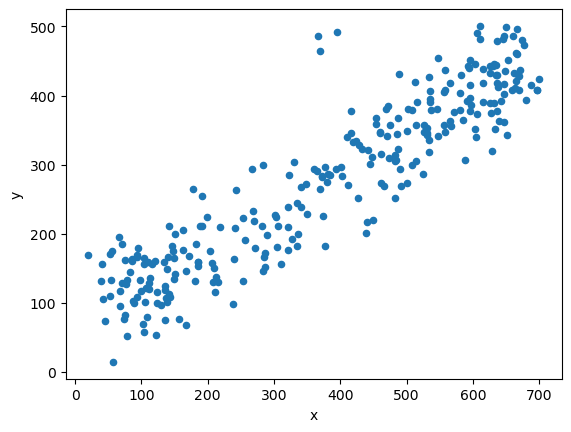

In [2]:
import matplotlib  # required to use pandas plotting in jupyterlite
import pandas as pd

df = widget.data_as_pandas
df.plot("x", "y", kind="scatter")

In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pylab as plt

weights = np.array([0,1])

def calc_all_err(weights):
    pred = weights[0] + weights[1] * df['x'].values
    return df['y'].values - pred
    
def calc_err(weights):
    return np.abs(calc_all_err(weights)).sum()

opt_weights = minimize(calc_err, weights, tol=0.01).x
y_pred = opt_weights[0] + opt_weights[1]*df['x'].values

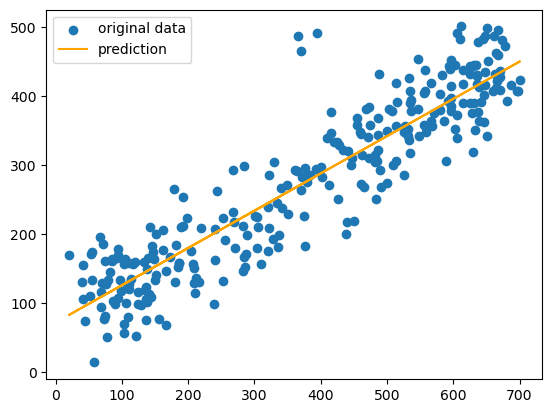

In [4]:
plt.scatter(df['x'], df['y'], label="original data");
plt.plot(df['x'], y_pred, label="prediction", c="orange");
plt.legend()

In [ ]:
%pip install ipywidgets
from ipywidgets import interact


@interact(w=(0.001, 0.999, 0.01))
def f(w):
    def calc_err(weights):
        errors = calc_all_err(weights)
        weighted_errors = np.where(errors < 0, w*np.abs(errors), (1-w)* np.abs(errors))
        return weighted_errors.sum()
    
    opt_weights = minimize(calc_err, weights, tol=0.01).x
    y_pred = opt_weights[0] + opt_weights[1]*df['x'].values

    plt.figure(figsize=(14,5))
    plt.subplot(1, 2, 1)
    plt.scatter(df['x'], df['y'], label="original data");
    plt.plot(df['x'], y_pred, label="prediction", c="orange");
    plt.legend()
    
    plt.subplot(1, 2, 2)
    x = np.linspace(-200, 200, 300)
    loss = np.where(x < 0, w*np.abs(x), (1-w)* np.abs(x))
    plt.plot(x, loss, label="loss")
    plt.legend()

Note: you may need to restart the kernel to use updated packages.


interactive(children=(FloatSlider(value=0.491, description='w', max=0.999, min=0.001, step=0.01), Output()), _…

In [6]:
from ipywidgets import interact
from sklearn.linear_model import QuantileRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

df = df.sort_values(['x'])
X = df[['x']].values
y = df['y'].values

@interact(w=(0.001, 0.499, 0.01))
def f(w):
    plt.figure(figsize=(14,5))
    plt.subplot(1, 2, 1)
    m1 = QuantileRegressor(quantile=0.5 - w)
    m2 = QuantileRegressor(quantile=0.5 + w)
    m1_pred = m1.fit(X, y).predict(X)
    m2_pred = m2.fit(X, y).predict(X)
    plt.scatter(df['x'], df['y'], label="original data", c="black")
    plt.plot(df['x'], m1_pred, label="lower quantile", c="orange")
    plt.plot(df['x'], m2_pred, label="upper quantile", c="orange")
    plt.fill_between(df['x'], m1_pred, m2_pred, color="orange", alpha=0.2)
    plt.title("QuantileRegressor")
    plt.xlim(0, 600)
    plt.ylim(0, 700)
    
    plt.subplot(1, 2, 2)
    m1 = HistGradientBoostingRegressor(quantile=0.5 - w, loss="quantile")
    m2 = HistGradientBoostingRegressor(quantile=0.5 + w, loss="quantile")
    m1_pred = m1.fit(X, y).predict(X)
    m2_pred = m2.fit(X, y).predict(X)
    plt.scatter(df['x'], df['y'], c="black")
    plt.plot(df['x'], m1_pred, c="orange")
    plt.plot(df['x'], m2_pred, c="orange")
    plt.fill_between(df['x'], m1_pred, m2_pred, color="orange", alpha=0.2)
    plt.title("HistGradientBoostingRegressor")
    plt.xlim(0, 600)
    plt.ylim(0, 700)

interactive(children=(FloatSlider(value=0.241, description='w', max=0.499, min=0.001, step=0.01), Output()), _…